In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df=pd.read_csv('chroma_features.csv')
data=pd.read_csv('mfcc_features.csv')
df3=pd.read_csv('lfcc_features.csv')

In [3]:
data.head()

,Unnamed: 0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,Temperature,Humidity,Label,Filename
0,0,-614.10540,-3.180938,-12.485398,-3.334575,-10.287359,0.344688,-8.581552,-2.596529,-5.230269,-3.159983,-3.599098,-1.963065,-4.175787,22.8,58.6,courtship,GBL_0046_01_001.wav
1,1,-615.20575,-0.948591,-12.825568,-4.078415,-9.072261,-1.473852,-8.538132,-2.308029,-6.000493,-1.545199,-4.266517,-1.616316,-3.956422,22.8,58.6,courtship,GBL_0046_01_002.wav
2,2,-614.96954,-0.547169,-10.646623,-4.219888,-9.529251,-1.436516,-7.934571,-2.678528,-5.267909,-2.539758,-4.251272,-0.795914,-4.367649,22.8,58.6,courtship,GBL_0046_01_003.wav
3,3,-614.62060,-1.399423,-12.805149,-4.967455,-11.298164,-2.475357,-7.935580,-0.939575,-2.338420,-0.294275,-3.632442,-1.200144,-4.511027,22.8,58.6,courtship,GBL_0046_01_004.wav
4,4,-615.27496,-0.031835,-10.841692,-3.048400,-8.531114,-1.790086,-8.464509,-2.022073,-3.379909,-1.526945,-4.524296,-1.325601,-4.432604,22.8,58.6,courtship,GBL_0046_01_005.wav


In [4]:
#dropping columns
data=data.drop(columns=['Unnamed: 0'],axis=1)

In [5]:
data.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,Temperature,Humidity,Label,Filename
0,-614.10540,-3.180938,-12.485398,-3.334575,-10.287359,0.344688,-8.581552,-2.596529,-5.230269,-3.159983,-3.599098,-1.963065,-4.175787,22.8,58.6,courtship,GBL_0046_01_001.wav
1,-615.20575,-0.948591,-12.825568,-4.078415,-9.072261,-1.473852,-8.538132,-2.308029,-6.000493,-1.545199,-4.266517,-1.616316,-3.956422,22.8,58.6,courtship,GBL_0046_01_002.wav
2,-614.96954,-0.547169,-10.646623,-4.219888,-9.529251,-1.436516,-7.934571,-2.678528,-5.267909,-2.539758,-4.251272,-0.795914,-4.367649,22.8,58.6,courtship,GBL_0046_01_003.wav
3,-614.62060,-1.399423,-12.805149,-4.967455,-11.298164,-2.475357,-7.935580,-0.939575,-2.338420,-0.294275,-3.632442,-1.200144,-4.511027,22.8,58.6,courtship,GBL_0046_01_004.wav
4,-615.27496,-0.031835,-10.841692,-3.048400,-8.531114,-1.790086,-8.464509,-2.022073,-3.379909,-1.526945,-4.524296,-1.325601,-4.432604,22.8,58.6,courtship,GBL_0046_01_005.wav


In [6]:
#combine the datasets
chroma_mfcc=pd.merge(df,data)
chroma_lfcc=pd.merge(df,df3)
mfcc_lfcc=pd.merge(data,df3)

## Chroma_Mfcc Feature combination

In [7]:
chroma_mfcc.head()

,Unnamed: 0,C,C#,D,D#,E,F,F#,G,G#,...,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,0,0.719711,0.731053,0.793824,0.838842,0.784447,0.706598,0.786601,0.717454,0.700665,...,-3.334575,-10.287359,0.344688,-8.581552,-2.596529,-5.230269,-3.159983,-3.599098,-1.963065,-4.175787
1,1,0.795826,0.808380,0.767941,0.820253,0.792821,0.704216,0.773024,0.804616,0.771626,...,-4.078415,-9.072261,-1.473852,-8.538132,-2.308029,-6.000493,-1.545199,-4.266517,-1.616316,-3.956422
2,2,0.778523,0.784773,0.808700,0.805103,0.749121,0.717717,0.752525,0.681978,0.725333,...,-4.219888,-9.529251,-1.436516,-7.934571,-2.678528,-5.267909,-2.539758,-4.251272,-0.795914,-4.367649
3,3,0.801949,0.787761,0.784814,0.799364,0.705189,0.733365,0.751102,0.724839,0.767311,...,-4.967455,-11.298164,-2.475357,-7.935580,-0.939575,-2.338420,-0.294275,-3.632442,-1.200144,-4.511027
4,4,0.796681,0.796880,0.801317,0.824423,0.830665,0.730091,0.716639,0.709058,0.724263,...,-3.048400,-8.531114,-1.790086,-8.464509,-2.022073,-3.379909,-1.526945,-4.524296,-1.325601,-4.432604


In [8]:
chroma_mfcc.columns

Index(['Unnamed: 0', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A',
       'A#', 'B', 'Temperature', 'Humidity', 'Label', 'Filename', 'mfcc1',
       'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
       'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13'],
      dtype='object')

In [9]:
chroma_mfcc.shape

(83809, 30)

In [10]:
chroma_mfcc=chroma_mfcc.drop(columns=['Unnamed: 0','Filename'],axis=1)

In [11]:
chroma_mfcc.head()

,C,C#,D,D#,E,F,F#,G,G#,A,...,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,0.719711,0.731053,0.793824,0.838842,0.784447,0.706598,0.786601,0.717454,0.700665,0.690752,...,-3.334575,-10.287359,0.344688,-8.581552,-2.596529,-5.230269,-3.159983,-3.599098,-1.963065,-4.175787
1,0.795826,0.808380,0.767941,0.820253,0.792821,0.704216,0.773024,0.804616,0.771626,0.752125,...,-4.078415,-9.072261,-1.473852,-8.538132,-2.308029,-6.000493,-1.545199,-4.266517,-1.616316,-3.956422
2,0.778523,0.784773,0.808700,0.805103,0.749121,0.717717,0.752525,0.681978,0.725333,0.733151,...,-4.219888,-9.529251,-1.436516,-7.934571,-2.678528,-5.267909,-2.539758,-4.251272,-0.795914,-4.367649
3,0.801949,0.787761,0.784814,0.799364,0.705189,0.733365,0.751102,0.724839,0.767311,0.737196,...,-4.967455,-11.298164,-2.475357,-7.935580,-0.939575,-2.338420,-0.294275,-3.632442,-1.200144,-4.511027
4,0.796681,0.796880,0.801317,0.824423,0.830665,0.730091,0.716639,0.709058,0.724263,0.740670,...,-3.048400,-8.531114,-1.790086,-8.464509,-2.022073,-3.379909,-1.526945,-4.524296,-1.325601,-4.432604


In [12]:
chroma_mfcc.to_csv('chroma_mfcc.csv')

In [13]:
# encoding the target column
label_encoder=preprocessing.LabelEncoder()
chroma_mfcc['Label_Encoded']=label_encoder.fit_transform(chroma_mfcc['Label'])
chroma_mfcc['Label_Encoded'].unique()

array([2, 1, 0])

In [14]:
min_max_scaler=preprocessing.MinMaxScaler()
chroma_mfcc[['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10',
                   'mfcc11','mfcc12','mfcc13','Temperature','Humidity']] = min_max_scaler.fit_transform(chroma_mfcc[['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7',
                                                                                                         'mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','Temperature','Humidity']])

In [15]:
chroma_mfcc.head(3)

,C,C#,D,D#,E,F,F#,G,G#,A,...,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,Label_Encoded
0,0.719711,0.731053,0.793824,0.838842,0.784447,0.706598,0.786601,0.717454,0.700665,0.690752,...,0.776101,0.159433,0.826888,0.758868,0.059816,0.825016,0.184950,0.347628,0.823652,2
1,0.795826,0.808380,0.767941,0.820253,0.792821,0.704216,0.773024,0.804616,0.771626,0.752125,...,0.796086,0.124837,0.828169,0.767514,0.039966,0.864567,0.165586,0.358377,0.830780,2
2,0.778523,0.784773,0.808700,0.805103,0.749121,0.717717,0.752525,0.681978,0.725333,0.733151,...,0.788570,0.125548,0.845978,0.756411,0.058846,0.840207,0.166029,0.383810,0.817417,2


In [16]:
chroma_mfcc.columns

Index(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B',
       'Temperature', 'Humidity', 'Label', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'Label_Encoded'],
      dtype='object')

In [17]:
#separating target and predictor values
combined_X=chroma_mfcc.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,
                                     19,20,21,22,23,24,25,26,27]]
combined_y=chroma_mfcc.iloc[:,[28]]

In [18]:
combined_X

,C,C#,D,D#,E,F,F#,G,G#,A,...,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,0.719711,0.731053,0.793824,0.838842,0.784447,0.706598,0.786601,0.717454,0.700665,0.690752,...,0.263682,0.776101,0.159433,0.826888,0.758868,0.059816,0.825016,0.184950,0.347628,0.823652
1,0.795826,0.808380,0.767941,0.820253,0.792821,0.704216,0.773024,0.804616,0.771626,0.752125,...,0.248002,0.796086,0.124837,0.828169,0.767514,0.039966,0.864567,0.165586,0.358377,0.830780
2,0.778523,0.784773,0.808700,0.805103,0.749121,0.717717,0.752525,0.681978,0.725333,0.733151,...,0.245019,0.788570,0.125548,0.845978,0.756411,0.058846,0.840207,0.166029,0.383810,0.817417
3,0.801949,0.787761,0.784814,0.799364,0.705189,0.733365,0.751102,0.724839,0.767311,0.737196,...,0.229260,0.759476,0.105784,0.845948,0.808526,0.134344,0.895206,0.183983,0.371279,0.812758
4,0.796681,0.796880,0.801317,0.824423,0.830665,0.730091,0.716639,0.709058,0.724263,0.740670,...,0.269715,0.804987,0.118821,0.830341,0.776084,0.107503,0.865014,0.158107,0.367389,0.815306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83804,0.475494,0.483717,0.546316,0.958237,0.643762,0.407991,0.413002,0.410490,0.447287,0.454140,...,0.323453,0.686191,0.239297,0.793752,0.675676,0.203076,0.669917,0.278599,0.443374,0.668380
83805,0.829125,0.824052,0.850473,0.894379,0.807563,0.694619,0.731815,0.792025,0.801647,0.783113,...,0.226667,0.817949,0.104665,0.878736,0.754135,0.050719,0.892703,0.163542,0.399387,0.829615
83806,0.406351,0.394682,0.500707,0.943411,0.555865,0.330818,0.339971,0.342616,0.352318,0.386479,...,0.350930,0.630081,0.301370,0.778676,0.731688,0.286786,0.676677,0.341379,0.396185,0.649064
83807,0.531006,0.569288,0.562185,0.835592,0.872642,0.507976,0.464406,0.472830,0.485418,0.508892,...,0.342621,0.714923,0.236096,0.793105,0.732057,0.212134,0.754718,0.322833,0.396747,0.704427


In [19]:
combined_y

,Label_Encoded
0,2
1,2
2,2
3,2
4,2
...,...
83804,0
83805,0
83806,0
83807,0


In [20]:
combined_X.head().T

,0,1,2,3,4
C,0.719711,0.795826,0.778523,0.801949,0.796681
C#,0.731053,0.808380,0.784773,0.787761,0.796880
D,0.793824,0.767941,0.808700,0.784814,0.801317
D#,0.838842,0.820253,0.805103,0.799364,0.824423
E,0.784447,0.792821,0.749121,0.705189,0.830665
F,0.706598,0.704216,0.717717,0.733365,0.730091
F#,0.786601,0.773024,0.752525,0.751102,0.716639
G,0.717454,0.804616,0.681978,0.724839,0.709058
G#,0.700665,0.771626,0.725333,0.767311,0.724263
A,0.690752,0.752125,0.733151,0.737196,0.740670


In [21]:
combined_y.head()

,Label_Encoded
0,2
1,2
2,2
3,2
4,2


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(combined_X,combined_y,test_size=0.30,random_state=42,stratify=combined_y)

In [23]:
X_train.columns

Index(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B',
       'Temperature', 'Humidity', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13'],
      dtype='object')

In [24]:
X_train.describe()

,C,C#,D,D#,E,F,F#,G,G#,A,...,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
count,58666.000000,58666.000000,58666.000000,58666.000000,58666.000000,58666.000000,58666.000000,58666.000000,58666.000000,58666.000000,...,58666.000000,58666.000000,58666.000000,58666.000000,58666.000000,58666.000000,58666.000000,58666.000000,58666.000000,58666.000000
mean,0.165744,0.211353,0.397921,0.715235,0.599797,0.185423,0.147880,0.142171,0.142541,0.144543,...,0.515814,0.436323,0.515510,0.588605,0.631111,0.474807,0.430595,0.493449,0.376726,0.525614
std,0.267095,0.305553,0.359612,0.272285,0.375817,0.237286,0.243534,0.233485,0.234656,0.238070,...,0.129572,0.186801,0.224289,0.221771,0.120259,0.191206,0.234540,0.250542,0.163949,0.146598
min,0.000186,0.000495,0.007001,0.037283,0.006247,0.001455,0.000365,0.000228,0.000185,0.000188,...,0.000000,0.041449,0.057440,0.000000,0.058086,0.000000,0.000000,0.001854,0.011463,0.000000
25%,0.001338,0.002179,0.033284,0.441084,0.184841,0.027125,0.001807,0.001312,0.001252,0.001235,...,0.453029,0.295629,0.367314,0.398104,0.558176,0.392271,0.215757,0.267124,0.225498,0.436789
50%,0.018152,0.032291,0.316398,0.801701,0.703284,0.083967,0.014693,0.014775,0.014748,0.014914,...,0.546452,0.410098,0.517320,0.634027,0.640999,0.537048,0.416414,0.446847,0.394388,0.506758
75%,0.193101,0.358046,0.760125,0.999469,1.000000,0.175029,0.158251,0.157830,0.158295,0.160406,...,0.606402,0.542046,0.693214,0.775383,0.730832,0.615237,0.587186,0.749896,0.474049,0.580324
max,0.924665,1.000000,1.000000,1.000000,1.000000,0.892525,0.892695,0.844513,0.860837,0.879938,...,0.910319,1.000000,1.000000,1.000000,0.876058,1.000000,1.000000,1.000000,0.982379,0.938185


## Handling data imbalance using SMOTE

(150549, 27)


<Axes: xlabel='Label_Encoded'>

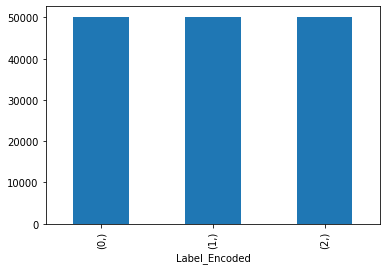

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_ssample, y_ssample=smote.fit_resample(X_train, y_train)

print(X_ssample.shape)

y_ssample.value_counts().plot(kind='bar')

In [26]:
X_ssample

,C,C#,D,D#,E,F,F#,G,G#,A,...,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,0.000576,0.001044,0.019650,0.417446,1.000000,0.091140,0.000922,0.000529,0.000510,0.000510,...,0.650332,0.192962,0.853212,0.226686,0.733171,0.692347,0.152595,0.847760,0.156204,0.535891
1,0.000439,0.000891,0.017567,0.411716,1.000000,0.084472,0.000869,0.000487,0.000425,0.000399,...,0.677909,0.154176,0.868795,0.193196,0.757905,0.611886,0.129052,0.870924,0.176899,0.558898
2,0.000579,0.001085,0.021405,0.440861,1.000000,0.077375,0.001106,0.000628,0.000570,0.000564,...,0.674084,0.179544,0.854308,0.179626,0.764701,0.610016,0.138088,0.885973,0.169445,0.547066
3,0.807502,0.847322,0.841869,0.848620,0.868967,0.801158,0.744674,0.740087,0.782896,0.797793,...,0.265901,0.756225,0.081000,0.810991,0.723059,0.091011,0.867443,0.179832,0.377521,0.774664
4,0.039357,0.043040,0.079800,0.726754,0.999157,0.096496,0.039501,0.036520,0.036985,0.038268,...,0.524147,0.426499,0.481902,0.656823,0.596220,0.514688,0.437469,0.462867,0.449034,0.453310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150544,0.718222,0.759372,0.791132,0.806405,0.913843,0.768344,0.688943,0.695069,0.658098,0.678404,...,0.252699,0.787184,0.174521,0.877543,0.806972,0.117766,0.828941,0.187260,0.352295,0.767120
150545,0.048169,0.063697,0.663011,1.000000,0.079290,0.042250,0.042834,0.044126,0.042146,0.043826,...,0.493136,0.468692,0.439233,0.731673,0.564671,0.470385,0.514176,0.370442,0.501646,0.457781
150546,0.858997,0.850156,0.847661,0.846328,0.757774,0.720840,0.729921,0.718426,0.738939,0.765483,...,0.267138,0.797520,0.112660,0.861000,0.767673,0.089098,0.861922,0.116729,0.370519,0.805888
150547,0.803248,0.816999,0.791226,0.795712,0.700876,0.662246,0.663091,0.663865,0.669086,0.687243,...,0.299678,0.756076,0.145183,0.853187,0.730034,0.118462,0.829480,0.164958,0.388365,0.728535


## SVM classifier

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

In [28]:
%%time
svm_chroma_mfcc = SVC()
svm_chroma_mfcc.fit(X_ssample, np.ravel(y_ssample))

CPU times: user 11min 25s, sys: 20.1 s, total: 11min 45s
Wall time: 15min 29s


SVC()

In [29]:
svm_cm_pred=svm_chroma_mfcc.predict(X_test)

In [30]:
svm_cm_accuracy=accuracy_score(y_test,svm_cm_pred)
print('Accuracy score is:',svm_cm_accuracy)
#checking performance using F1-score
svm_cm_f1 = f1_score(y_test,svm_cm_pred,average='weighted')
print('F1 score is:',svm_cm_f1)

Accuracy score is: 0.7706717575468321
F1 score is: 0.8246090074551281


## KNN classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
%%time
knn_cm=KNeighborsClassifier()
knn_cm.fit(X_ssample, np.ravel(y_ssample))

CPU times: user 25.5 ms, sys: 111 ms, total: 136 ms
Wall time: 512 ms


KNeighborsClassifier()

In [33]:
#model prediction
knn_cm_pred=knn_cm.predict(X_test)

In [34]:
#evaluating the perfomance of the model
knn_cm_accuracy=accuracy_score(y_test,knn_cm_pred)
print('KNN accuracy score is:',knn_cm_accuracy)
knn_cm_f1=f1_score(y_test,knn_cm_pred,average='weighted')
print('KNN f1-score is:',knn_cm_f1)

KNN accuracy score is: 0.881597263651911
KNN f1-score is: 0.897381908015996


## Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

## Random Forest Classifier without hyperparameter tuning

In [36]:
%%time
Rf_cm_model=RandomForestClassifier(random_state=42)
Rf_cm_model.fit(X_ssample,np.ravel(y_ssample))

CPU times: user 2min 37s, sys: 3.38 s, total: 2min 40s
Wall time: 3min 24s


RandomForestClassifier(random_state=42)

In [37]:
#Model prediction
Rf_cm_pred=Rf_cm_model.predict(X_test)

In [38]:
#Evaluating the model performance
rf_cm_accuracy=accuracy_score(y_test,Rf_cm_pred)
print("RF with Feature combination accuracy is:",rf_cm_accuracy.round(4))
rf_cm_f1=f1_score(y_test,Rf_cm_pred,average='weighted')
print("RF with Feature combination f1-score is:",rf_cm_f1.round(4))

RF with Feature combination accuracy is: 0.9441
RF with Feature combination f1-score is: 0.9463


## RF Feature Importance

In [110]:
importances = Rf_cm_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
normalized_importances = importances / np.sum(importances)

In [111]:
#obtaining feature names
column_names=['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B',
       'Temperature', 'Humidity', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
      'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13']

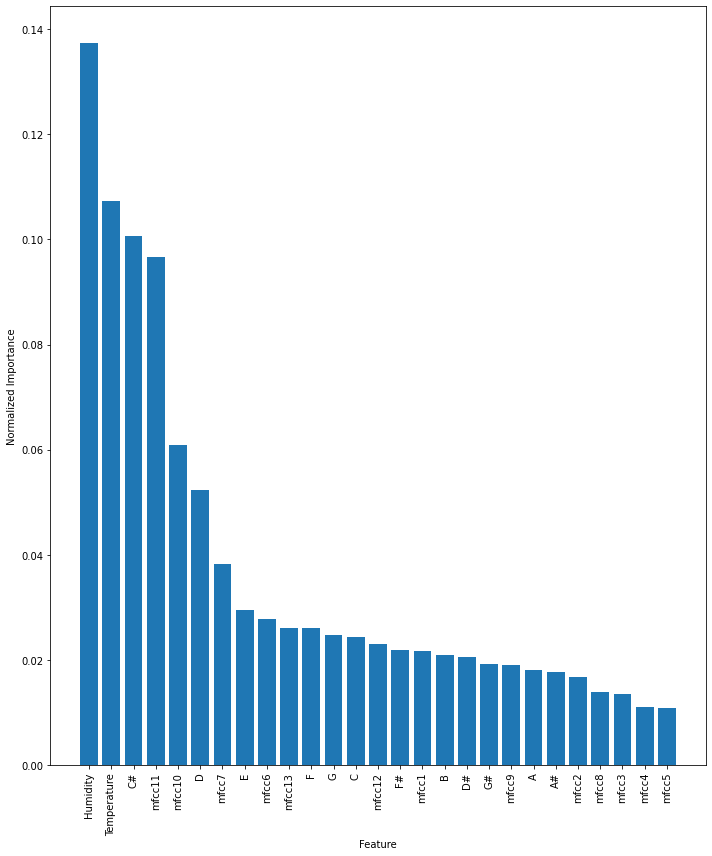

In [113]:
top_n = 27

# Plot the feature importances
plt.figure(figsize=(10,12))
#plt.title("Top {} Feature Importances".format(top_n))
plt.bar(range(top_n), normalized_importances[sorted_indices[:top_n]], align="center")
plt.xticks(range(top_n),[column_names[i] for i in sorted_indices[:top_n]],rotation=90)
plt.xlabel("Feature")
plt.ylabel("Normalized Importance")
plt.tight_layout()
plt.show()

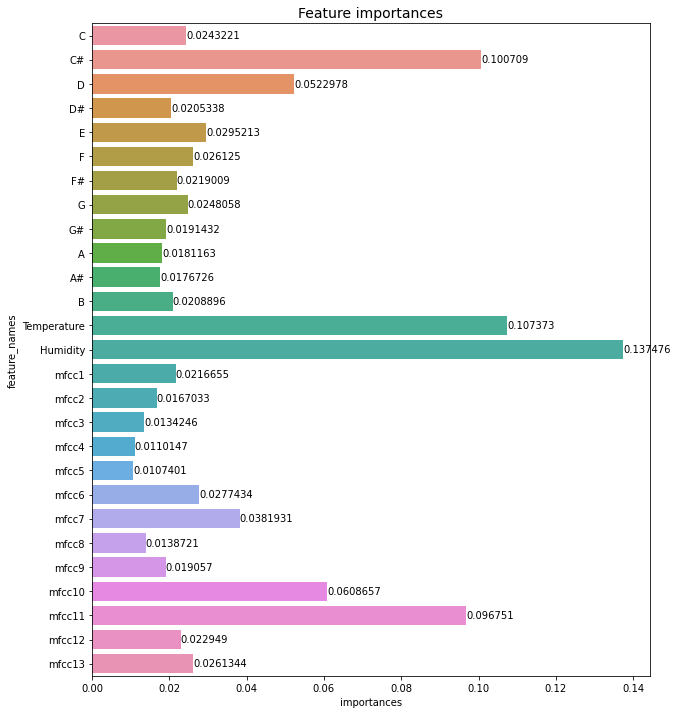

In [108]:
#visualize the feature importances using bar plot
importances_df=pd.DataFrame({"feature_names":Rf_cm_model.feature_names_in_,
                             "importances":Rf_cm_model.feature_importances_})
#plotting bar chart
plt.figure(figsize=(10, 12))
g = sns.barplot(data=importances_df,
                x="importances",
                y="feature_names"
               )
g.set_title("Feature importances", fontsize=14)
for value in g.containers:
    g.bar_label(value)


In [43]:
df1=chroma_mfcc[['Humidity','mfcc11','Temperature','C#','mfcc10','D','mfcc7',
                 'mfcc13','F','E','C','mfcc12','F#','mfcc6','D#','G','G#','B',
                 'A','mfcc1','mfcc9','mfcc2','mfcc3','mfcc8','A#','mfcc4','mfcc5','Label_Encoded']]

In [44]:
df1.head()

,Humidity,mfcc11,Temperature,C#,mfcc10,D,mfcc7,mfcc13,F,E,...,A,mfcc1,mfcc9,mfcc2,mfcc3,mfcc8,A#,mfcc4,mfcc5,Label_Encoded
0,0.82266,0.184950,0.468085,0.731053,0.825016,0.793824,0.826888,0.823652,0.706598,0.784447,...,0.690752,0.081271,0.059816,0.797531,0.739053,0.758868,0.697411,0.263682,0.776101,2
1,0.82266,0.165586,0.468085,0.808380,0.864567,0.767941,0.828169,0.830780,0.704216,0.792821,...,0.752125,0.067180,0.039966,0.830632,0.734110,0.767514,0.788543,0.248002,0.796086,2
2,0.82266,0.166029,0.468085,0.784773,0.840207,0.808700,0.845978,0.817417,0.717717,0.749121,...,0.733151,0.070205,0.058846,0.836584,0.765774,0.756411,0.725552,0.245019,0.788570,2
3,0.82266,0.183983,0.468085,0.787761,0.895206,0.784814,0.845948,0.812758,0.733365,0.705189,...,0.737196,0.074673,0.134344,0.823947,0.734407,0.808526,0.738395,0.229260,0.759476,2
4,0.82266,0.158107,0.468085,0.796880,0.865014,0.801317,0.830341,0.815306,0.730091,0.830665,...,0.740670,0.066293,0.107503,0.844225,0.762939,0.776084,0.743415,0.269715,0.804987,2


In [45]:
predictor=df1.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,
                   15,16,17,18,19,20,21,22,23,24,25,26]]
target=df1.iloc[:,[27]]

In [46]:
target.head()

,Label_Encoded
0,2
1,2
2,2
3,2
4,2


In [47]:
predictor.head()

,Humidity,mfcc11,Temperature,C#,mfcc10,D,mfcc7,mfcc13,F,E,...,B,A,mfcc1,mfcc9,mfcc2,mfcc3,mfcc8,A#,mfcc4,mfcc5
0,0.82266,0.184950,0.468085,0.731053,0.825016,0.793824,0.826888,0.823652,0.706598,0.784447,...,0.682494,0.690752,0.081271,0.059816,0.797531,0.739053,0.758868,0.697411,0.263682,0.776101
1,0.82266,0.165586,0.468085,0.808380,0.864567,0.767941,0.828169,0.830780,0.704216,0.792821,...,0.775452,0.752125,0.067180,0.039966,0.830632,0.734110,0.767514,0.788543,0.248002,0.796086
2,0.82266,0.166029,0.468085,0.784773,0.840207,0.808700,0.845978,0.817417,0.717717,0.749121,...,0.768984,0.733151,0.070205,0.058846,0.836584,0.765774,0.756411,0.725552,0.245019,0.788570
3,0.82266,0.183983,0.468085,0.787761,0.895206,0.784814,0.845948,0.812758,0.733365,0.705189,...,0.783974,0.737196,0.074673,0.134344,0.823947,0.734407,0.808526,0.738395,0.229260,0.759476
4,0.82266,0.158107,0.468085,0.796880,0.865014,0.801317,0.830341,0.815306,0.730091,0.830665,...,0.764478,0.740670,0.066293,0.107503,0.844225,0.762939,0.776084,0.743415,0.269715,0.804987


In [49]:
results_table = pd.DataFrame(columns=['Iteration','Columns','F1-score','Accuracy'])

In [50]:
max_columns=27
for num_columns in range(6, max_columns+1):
    column_names = predictor.columns[:num_columns].tolist()
    # Select the first 'num_columns' columns
    X_subset = predictor.iloc[:, :num_columns]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset.values,target.values, test_size=0.30, random_state=42,stratify=target)
    
    # Apply SMOTE to the training data
    smote = SMOTE(random_state=42, k_neighbors=100)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    # Create and fit the Random Forest classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_smote, np.ravel(y_train_smote))
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate f1-score and store the results in the table
    f1_score_value=f1_score(y_test, y_pred,average='weighted')
    accuracy_value=accuracy_score(y_test,y_pred)
    # Calculate bias and variance using bias_variance_decomp()
    #log_loss, bias, variance = bias_variance_decomp(clf,X_train_smote,np.ravel(y_train_smote), X_test, y_test,num_rounds=0,loss='0-1_loss', random_seed=42)
    results_table = results_table.append({'Iteration':num_columns,'Columns': column_names, 'F1-score':f1_score_value,'Accuracy':accuracy_value}, ignore_index=True)

/var/folders/xy/pp0ft_ld1sjd2fx4mj21mvqm0000gn/T/ipykernel_35889/246136668.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Iteration':num_columns,'Columns': column_names, 'F1-score':f1_score_value,'Accuracy':accuracy_value}, ignore_index=True)
/var/folders/xy/pp0ft_ld1sjd2fx4mj21mvqm0000gn/T/ipykernel_35889/246136668.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Iteration':num_columns,'Columns': column_names, 'F1-score':f1_score_value,'Accuracy':accuracy_value}, ignore_index=True)
/var/folders/xy/pp0ft_ld1sjd2fx4mj21mvqm0000gn/T/ipykernel_35889/246136668.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table

In [51]:
print(results_table.sort_values('F1-score', ascending=False))

   Iteration                                            Columns  F1-score  \
0          6     [Humidity, mfcc11, Temperature, C#, mfcc10, D]  0.956332   
1          7  [Humidity, mfcc11, Temperature, C#, mfcc10, D,...   0.95159   
3          9  [Humidity, mfcc11, Temperature, C#, mfcc10, D,...  0.950722   
4         10  [Humidity, mfcc11, Temperature, C#, mfcc10, D,...  0.947505   
2          8  [Humidity, mfcc11, Temperature, C#, mfcc10, D,...  0.945134   
5         11  [Humidity, mfcc11, Temperature, C#, mfcc10, D,...  0.943236   
6         12  [Humidity, mfcc11, Temperature, C#, mfcc10, D,...  0.940041   
10        16  [Humidity, mfcc11, Temperature, C#, mfcc10, D,...  0.939475   
7         13  [Humidity, mfcc11, Temperature, C#, mfcc10, D,...  0.938632   
8         14  [Humidity, mfcc11, Temperature, C#, mfcc10, D,...   0.93792   
11        17  [Humidity, mfcc11, Temperature, C#, mfcc10, D,...  0.937707   
19        25  [Humidity, mfcc11, Temperature, C#, mfcc10, D,...  0.937135   

In [52]:
results_table.head()

,Iteration,Columns,F1-score,Accuracy
0,6,"[Humidity, mfcc11, Temperature, C#, mfcc10, D]",0.956332,0.953745
1,7,"[Humidity, mfcc11, Temperature, C#, mfcc10, D,...",0.95159,0.948574
2,8,"[Humidity, mfcc11, Temperature, C#, mfcc10, D,...",0.945134,0.941415
3,9,"[Humidity, mfcc11, Temperature, C#, mfcc10, D,...",0.950722,0.94762
4,10,"[Humidity, mfcc11, Temperature, C#, mfcc10, D,...",0.947505,0.944199


In [53]:
results_table['Iteration'][0]

6

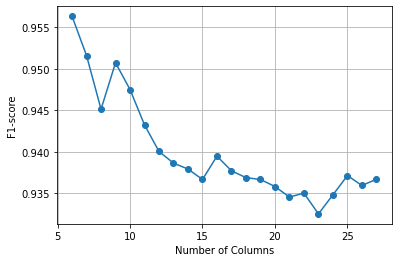

In [55]:
# Plotting the results for F1-score performance
plt.plot(results_table['Iteration'], results_table['F1-score'], marker='o')
plt.xlabel('Number of Columns')
plt.ylabel('F1-score')
#plt.title('Feature Performance')
plt.grid(True)
plt.show()

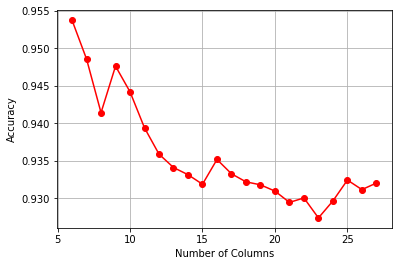

In [106]:
#plotting the results for Accuracy Performance
plt.plot(results_table['Iteration'], results_table['Accuracy'], marker='o',color="red")
plt.xlabel('Number of Columns')
plt.ylabel('Accuracy')
#plt.title('Feature Performance')
plt.grid(True)
plt.show()

## Chroma-LFCC feature combination

In [57]:
chroma_lfcc=pd.merge(df,df3)

In [58]:
chroma_lfcc.head()

,Unnamed: 0,C,C#,D,D#,E,F,F#,G,G#,...,4,5,6,7,8,9,10,11,12,13
0,0,0.719711,0.731053,0.793824,0.838842,0.784447,0.706598,0.786601,0.717454,0.700665,...,1.851156,1.858736,1.865850,1.902462,1.711886,1.675420,1.812621,1.705748,1.764450,1.597805
1,1,0.795826,0.808380,0.767941,0.820253,0.792821,0.704216,0.773024,0.804616,0.771626,...,1.982068,1.814261,1.746412,1.708292,2.132673,1.908205,1.706393,1.763628,1.822085,1.990529
2,2,0.778523,0.784773,0.808700,0.805103,0.749121,0.717717,0.752525,0.681978,0.725333,...,1.739466,1.791041,1.666589,1.546354,1.872313,1.817568,1.770668,1.806223,1.771788,1.905386
3,3,0.801949,0.787761,0.784814,0.799364,0.705189,0.733365,0.751102,0.724839,0.767311,...,1.784294,1.915372,1.877360,2.084902,1.777386,1.671387,1.821157,1.770432,1.628602,1.742762
4,4,0.796681,0.796880,0.801317,0.824423,0.830665,0.730091,0.716639,0.709058,0.724263,...,1.657927,1.872988,1.622976,1.668177,1.765514,1.787684,1.606202,1.691925,1.706215,1.723307


In [59]:
chroma_lfcc.shape

(83809, 30)

In [60]:
chroma_lfcc=chroma_lfcc.drop(columns=['Unnamed: 0','Filename'],axis=1)

In [61]:
chroma_lfcc.shape

(83809, 28)

In [62]:
#one hot encoding the label column
label_encoder=preprocessing.LabelEncoder()
chroma_lfcc['Label_Encoded']=label_encoder.fit_transform(chroma_lfcc['Label'])
chroma_lfcc['Label_Encoded'].unique()

array([2, 1, 0])

In [63]:
chroma_lfcc.columns

Index(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B',
       'Temperature', 'Humidity', 'Label', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', 'Label_Encoded'],
      dtype='object')

In [64]:
#separating the target and predictor columns
#separating target and predictor values
cl_X=chroma_lfcc.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,
                                     19,20,21,22,23,24,25,26,27]]
cl_y=chroma_lfcc.iloc[:,[28]]

In [65]:
cl_X.columns

Index(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B',
       'Temperature', 'Humidity', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13'],
      dtype='object')

In [66]:
cl_y.columns

Index(['Label_Encoded'], dtype='object')

In [67]:
#splitting the data into train, test split
cl_X_train,cl_X_test,cl_y_train,cl_y_test=train_test_split(cl_X,cl_y,test_size=0.30,random_state=42,stratify=cl_y)

In [68]:
cl_X_train.shape

(58666, 27)

In [69]:
#scaling the data into a range of [0,1] using min-max scaler
min_max_scaler=preprocessing.MinMaxScaler()
cl_X_train[['1','2','3','4','5','6','7','8','9','10',
                   '11','12','13','Temperature','Humidity']] = min_max_scaler.fit_transform(cl_X_train[['1','2','3','4','5','6','7',
                                                                                                         '8','9','10','11','12','13','Temperature','Humidity']])

In [70]:
#scaling the test data
cl_X_test[['1','2','3','4','5','6','7','8','9','10',
                   '11','12','13','Temperature','Humidity']] = min_max_scaler.fit_transform(cl_X_test[['1','2','3','4','5','6','7',
                                                                                                         '8','9','10','11','12','13','Temperature','Humidity']])

## Handling data imbalance using SMOTE

(150549, 27)


<Axes: title={'center': 'Count of Classes'}, xlabel='Label_Encoded'>

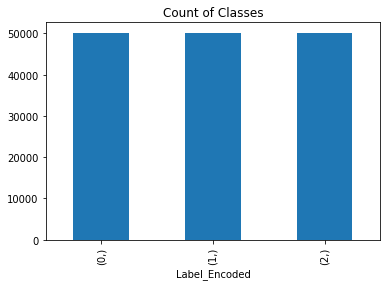

In [71]:
smote = SMOTE(random_state=42, k_neighbors=100)
cl_X_ssample, cl_y_ssample=smote.fit_resample(cl_X_train, cl_y_train)

print(cl_X_ssample.shape)

cl_y_ssample.value_counts().plot(kind='bar', title='Count of Classes')

## Chroma_LFCC trained on SVM

In [72]:
%%time
svm_chroma_lfcc = SVC()
svm_chroma_lfcc.fit(cl_X_ssample, np.ravel(cl_y_ssample))

CPU times: user 10min 37s, sys: 7.42 s, total: 10min 44s
Wall time: 11min 31s


SVC()

In [73]:
svm_cl_pred=svm_chroma_lfcc.predict(cl_X_test)

In [74]:
svm_cl_accuracy=accuracy_score(cl_y_test,svm_cl_pred)
print('Accuracy score is:',svm_cl_accuracy.round(4))
#checking performance using F1-score
svm_cl_f1 = f1_score(cl_y_test,svm_cl_pred,average='weighted')
print('F1 score is:',svm_cl_f1.round(4))

Accuracy score is: 0.7699
F1 score is: 0.8232


## Chroma_LFCC trained on KNN

In [75]:
%%time
knn_cl=KNeighborsClassifier()
knn_cl.fit(cl_X_ssample, np.ravel(cl_y_ssample))

CPU times: user 29.6 ms, sys: 160 ms, total: 190 ms
Wall time: 573 ms


KNeighborsClassifier()

In [76]:
#model prediction
knn_cl_pred=knn_cl.predict(cl_X_test)

In [77]:
#evaluating the perfomance of the model
knn_cl_accuracy=accuracy_score(cl_y_test,knn_cl_pred)
print('KNN accuracy score is:',knn_cl_accuracy.round(4))
knn_cl_f1=f1_score(cl_y_test,knn_cl_pred,average='weighted')
print('KNN f1-score is:',knn_cl_f1.round(4))

KNN accuracy score is: 0.8077
KNN f1-score is: 0.848


## Chroma_LFCC trained on RF

In [78]:
%%time
Rf_cl_model=RandomForestClassifier(random_state=42)
Rf_cl_model.fit(cl_X_ssample, np.ravel(cl_y_ssample))

CPU times: user 2min 7s, sys: 909 ms, total: 2min 8s
Wall time: 2min 13s


RandomForestClassifier(random_state=42)

In [79]:
#Model prediction
Rf_cl_pred=Rf_cl_model.predict(cl_X_test)

In [80]:
#Evaluating the model performance
rf_cl_accuracy=accuracy_score(cl_y_test,Rf_cl_pred)
print("RF with Feature combination accuracy is:",rf_cl_accuracy.round(4))
rf_cl_f1=f1_score(cl_y_test,Rf_cl_pred,average='weighted')
print("RF with Feature combination f1-score is:",rf_cl_f1.round(4))

RF with Feature combination accuracy is: 0.924
RF with Feature combination f1-score is: 0.9288


## MFCC-LFCC Feature combination

In [81]:
mfcc_lfcc.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,4,5,6,7,8,9,10,11,12,13
0,-614.10540,-3.180938,-12.485398,-3.334575,-10.287359,0.344688,-8.581552,-2.596529,-5.230269,-3.159983,...,1.851156,1.858736,1.865850,1.902462,1.711886,1.675420,1.812621,1.705748,1.764450,1.597805
1,-615.20575,-0.948591,-12.825568,-4.078415,-9.072261,-1.473852,-8.538132,-2.308029,-6.000493,-1.545199,...,1.982068,1.814261,1.746412,1.708292,2.132673,1.908205,1.706393,1.763628,1.822085,1.990529
2,-614.96954,-0.547169,-10.646623,-4.219888,-9.529251,-1.436516,-7.934571,-2.678528,-5.267909,-2.539758,...,1.739466,1.791041,1.666589,1.546354,1.872313,1.817568,1.770668,1.806223,1.771788,1.905386
3,-614.62060,-1.399423,-12.805149,-4.967455,-11.298164,-2.475357,-7.935580,-0.939575,-2.338420,-0.294275,...,1.784294,1.915372,1.877360,2.084902,1.777386,1.671387,1.821157,1.770432,1.628602,1.742762
4,-615.27496,-0.031835,-10.841692,-3.048400,-8.531114,-1.790086,-8.464509,-2.022073,-3.379909,-1.526945,...,1.657927,1.872988,1.622976,1.668177,1.765514,1.787684,1.606202,1.691925,1.706215,1.723307


In [82]:
#Drop columns
mfcc_lfcc=mfcc_lfcc.drop(columns=['Unnamed: 0','Filename'],axis=1)

In [83]:
mfcc_lfcc.columns

Index(['mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8',
       'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'Temperature',
       'Humidity', 'Label', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13'],
      dtype='object')

In [84]:
#encode the label feature
mfcc_lfcc['Label_Encoded']=label_encoder.fit_transform(mfcc_lfcc['Label'])
mfcc_lfcc['Label_Encoded'].unique()

array([2, 1, 0])

In [85]:
mfcc_lfcc.head().T

,0,1,2,3,4
mfcc1,-614.1054,-615.20575,-614.96954,-614.6206,-615.27496
mfcc2,-3.180938,-0.948591,-0.547169,-1.399423,-0.031835
mfcc3,-12.485398,-12.825568,-10.646623,-12.805149,-10.841692
mfcc4,-3.334575,-4.078415,-4.219888,-4.967455,-3.0484
mfcc5,-10.287359,-9.072261,-9.529251,-11.298164,-8.531114
mfcc6,0.344688,-1.473852,-1.436516,-2.475357,-1.790086
mfcc7,-8.581552,-8.538132,-7.934571,-7.93558,-8.464509
mfcc8,-2.596529,-2.308029,-2.678528,-0.939575,-2.022073
mfcc9,-5.230269,-6.000493,-5.267909,-2.33842,-3.379909
mfcc10,-3.159983,-1.545199,-2.539758,-0.294275,-1.526945


In [86]:
mfcc_lfcc.shape

(83809, 30)

In [87]:
#split the data into target and predictor variables
ml_X=mfcc_lfcc.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,
                                     19,20,21,22,23,24,25,26,27,28]]
ml_y=mfcc_lfcc.iloc[:,[29]]

In [88]:
ml_X.head().T

,0,1,2,3,4
mfcc1,-614.105400,-615.205750,-614.969540,-614.620600,-615.274960
mfcc2,-3.180938,-0.948591,-0.547169,-1.399423,-0.031835
mfcc3,-12.485398,-12.825568,-10.646623,-12.805149,-10.841692
mfcc4,-3.334575,-4.078415,-4.219888,-4.967455,-3.048400
mfcc5,-10.287359,-9.072261,-9.529251,-11.298164,-8.531114
mfcc6,0.344688,-1.473852,-1.436516,-2.475357,-1.790086
mfcc7,-8.581552,-8.538132,-7.934571,-7.935580,-8.464509
mfcc8,-2.596529,-2.308029,-2.678528,-0.939575,-2.022073
mfcc9,-5.230269,-6.000493,-5.267909,-2.338420,-3.379909
mfcc10,-3.159983,-1.545199,-2.539758,-0.294275,-1.526945


In [89]:
#split the data into training and test dataset
ml_X_train,ml_X_test,ml_y_train,ml_y_test=train_test_split(ml_X,ml_y,test_size=0.30,random_state=42,stratify=ml_y)

In [90]:
#scaling the xtrain and xtest
ml_X_train = min_max_scaler.fit_transform(ml_X_train)

In [91]:
ml_X_test=min_max_scaler.fit_transform(ml_X_test)

In [92]:
ml_X_train.shape

(58666, 28)

In [93]:
ml_y_train.shape

(58666, 1)

In [94]:
ml_X_test.shape

(25143, 28)

(150549, 28)


<Axes: title={'center': 'Count of Classes'}, xlabel='Label_Encoded'>

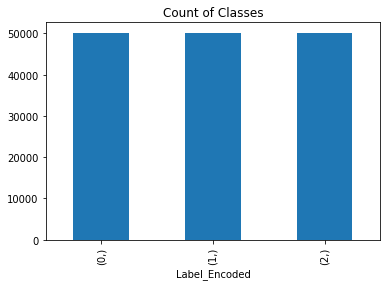

In [95]:
# handling imbalance with SMOTE
smote = SMOTE(random_state=42, k_neighbors=100)
ml_X_ssample, ml_y_ssample=smote.fit_resample(ml_X_train, ml_y_train)

print(ml_X_ssample.shape)

ml_y_ssample.value_counts().plot(kind='bar', title='Count of Classes')

## MFCC_LFCC with SVM

In [96]:
%%time
svm_mfcc_lfcc = SVC()
svm_mfcc_lfcc.fit(ml_X_ssample, np.ravel(ml_y_ssample))

CPU times: user 11min 52s, sys: 13 s, total: 12min 5s
Wall time: 13min 45s


SVC()

In [97]:
svm_ml_pred=svm_mfcc_lfcc.predict(ml_X_test)

In [98]:
svm_ml_accuracy=accuracy_score(ml_y_test,svm_ml_pred)
print('Accuracy score is:',svm_ml_accuracy.round(4))
#checking performance using F1-score
svm_ml_f1 = f1_score(ml_y_test,svm_ml_pred,average='weighted')
print('F1 score is:',svm_ml_f1.round(4))

Accuracy score is: 0.5541
F1 score is: 0.681


## MFCC_LFCC with KNN

In [99]:
%%time
knn_ml=KNeighborsClassifier()
knn_ml.fit(ml_X_ssample, np.ravel(ml_y_ssample))

CPU times: user 19.2 ms, sys: 19.4 ms, total: 38.5 ms
Wall time: 72.1 ms


KNeighborsClassifier()

In [100]:
#model prediction
knn_ml_pred=knn_ml.predict(ml_X_test)

In [101]:
#evaluating the perfomance of the model
knn_ml_accuracy=accuracy_score(ml_y_test,knn_ml_pred)
print('KNN accuracy score is:',knn_ml_accuracy.round(4))
knn_ml_f1=f1_score(ml_y_test,knn_ml_pred,average='weighted')
print('KNN f1-score is:',knn_ml_f1.round(4))

KNN accuracy score is: 0.7971
KNN f1-score is: 0.8423


## MFCC_LFCC with RF

In [102]:
%%time
Rf_ml_model=RandomForestClassifier(random_state=42)
Rf_ml_model.fit(ml_X_ssample, np.ravel(ml_y_ssample))

CPU times: user 2min 14s, sys: 1.07 s, total: 2min 15s
Wall time: 2min 18s


RandomForestClassifier(random_state=42)

In [103]:
#Model prediction
Rf_ml_pred=Rf_ml_model.predict(ml_X_test)

In [104]:
#Evaluating the model performance
rf_ml_accuracy=accuracy_score(ml_y_test,Rf_ml_pred)
print("RF with Feature combination accuracy is:",rf_ml_accuracy.round(4))
rf_ml_f1=f1_score(ml_y_test,Rf_ml_pred,average='weighted')
print("RF with Feature combination f1-score is:",rf_ml_f1.round(4))

RF with Feature combination accuracy is: 0.9294
RF with Feature combination f1-score is: 0.9271
